In [26]:
from IPython.display import Image
import os 
import time 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [10]:
# Split data from folder 
data_dir="data"

classes = ['positiveReviews', 'negativeReviews']

train_data=[]
train_labels=[]
test_data=[]
test_labels=[]

for curr_class in classes:
    dirname=os.path.join(data_dir,curr_class)
    for fname in os.listdir(dirname):
        with open(os.path.join(dirname,fname),"r") as f:
                content=f.read()
                
                if fname.startswith("12"):
                    test_data.append(content)
                    test_labels.append(curr_class)
                else:
                    train_data.append(content)
                    train_labels.append(curr_class)

print(len(test_data))
print(len(train_data))

1222
23778


### Tf-idf

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.


**TF**: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

**TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)**

**IDF**: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

**IDF(t) = log_e(Total number of documents / Number of documents with term t in it)**


In [11]:
# Create feature vectors
vectorizer=TfidfVectorizer(min_df=5,
                          max_df=0.8,
                          sublinear_tf=True,
                          use_idf=True)

train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

In [12]:
test_vectors.toarray()

array([[0.        , 0.07790818, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
# Make ml models
clf_nb=MultinomialNB()
clf_nb.fit(train_vectors,train_labels)
prediction_nb=clf_nb.predict(test_vectors)

clf_rf=ensemble.RandomForestClassifier()
clf_rf.fit(train_vectors,train_labels)
prediction_rf=clf_rf.predict(test_vectors)


clf_lr=linear_model.LogisticRegression()
clf_lr.fit(train_vectors,train_labels)
prediction_lr=clf_lr.predict(test_vectors)


clf_svm=svm.SVC()
clf_svm.fit(train_vectors,train_labels)
prediction_svm=clf_svm.predict(test_vectors)


clf_svm_l=svm.LinearSVC()
clf_svm_l.fit(train_vectors,train_labels)
prediction_svm_l=clf_svm_l.predict(test_vectors)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**Road Map**

**True Positive (TP)**: The true label of the given instance is positive, and the classifier also predicts it as a positive

**True Negative (TN)**: The true label is negative, and the classifier also predicts a negative

**False Positive (FP)**: The true label is negative, but the classifier incorrectly predicts it as positive

**False Negative (FN)**: The true label is positive, but the classifier incorrectly predicts it as negative

![title](images/1.png)


**Precision**: Precision is the ability of the classifier to assign a
positive class label for samples that originally belong to a positive class label
**Precision=TP/TP+FP**

**Recall** :Recall is the ability of the classifier to find all the positive
samples. 
**Recall=TP/TP+FN**

**F1-Score**: F1-score is the harmonic means of precision and recall.
**F1 = 2 * (precision * recall) / (precision + recall)**

a useful link : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

**Naive Bayes evaluate**

In [15]:
print("~ Results for NaiveBayes\n")
print(classification_report(test_labels,prediction_nb))
print("~ Accuracy scoer of Multinomial NavieBayes algorithm --->" +str(accuracy_score(test_labels,
                                                                                   prediction_nb)))
i=1

print("\n")

print("~ Reviews Prediction")
print("\nTest label is       ----> "+test_labels[i])
print("Prediction label is ----> "+prediction_nb[i])
print("\n*** Movies Review *** \n"+test_data[i])

~ Results for NaiveBayes

                 precision    recall  f1-score   support

negativeReviews       0.79      0.87      0.82       611
positiveReviews       0.85      0.77      0.81       611

      micro avg       0.82      0.82      0.82      1222
      macro avg       0.82      0.82      0.82      1222
   weighted avg       0.82      0.82      0.82      1222

~ Accuracy scoer of Multinomial NavieBayes algorithm --->0.8158756137479541


~ Reviews Prediction

Test label is       ----> positiveReviews
Prediction label is ----> negativeReviews

*** Movies Review *** 
This movie scared the crap out of me! I have to admit that I spent most of the film watching through my fingers but what I saw was really scary. I screamed out loud two or three times during the show.<br /><br />Film-making-wise my favorite aspects were the sound and photography. The sound was particularly great and the setting was really creepy beautiful. I read somewhere that it's some weird husband and wife team th

**That is interesting sample. We can measure of algorithn performance according to this sample**

In [16]:
print(clf_nb.predict_proba(test_vectors[1]))
print(clf_nb.predict(test_vectors[1]))

[[0.69652871 0.30347129]]
['negativeReviews']


**Logistic Regression evaluate**

~ Results for Logistic Regression

                 precision    recall  f1-score   support

negativeReviews       0.86      0.88      0.87       611
positiveReviews       0.88      0.86      0.87       611

      micro avg       0.87      0.87      0.87      1222
      macro avg       0.87      0.87      0.87      1222
   weighted avg       0.87      0.87      0.87      1222

~ Accuracy scoer of Multinomial Logistic Regression algorithm --->0.8707037643207856


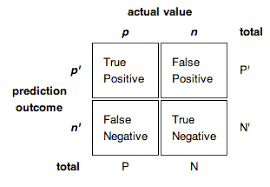

In [27]:
i=1
prediction=prediction_lr
alg="Logistic Regression"
print("~ Results for {}\n".format(alg))
print(classification_report(test_labels,prediction))
print("~ Accuracy scoer of Multinomial {} algorithm --->".format(alg) +str(accuracy_score(test_labels,
                                                                                   prediction)))


print("\n")

print("~ Reviews Prediction")
print("\nTest label is       ----> "+test_labels[i])
print("Prediction label is ----> "+prediction[i])
print("\n*** Movies Review *** \n"+test_data[i])

**Wow ! This is really impressive performance**

In [18]:
print(clf_lr.predict_proba(test_vectors[1]))
print(clf_lr.predict(test_vectors[1]))

[[0.21991114 0.78008886]]
['positiveReviews']


**Which samples are wrongs ?**

In [19]:
# find wrong predictions
proba_lr=clf_lr.predict_proba(test_vectors)
wrong_list=[]
for i in range(len(prediction_lr)):
    if prediction_lr[i]!=test_labels[i]:
        pr=prediction_lr[i]
        ts=test_labels[i]
        t_m=test_data[i]
        t_p=proba_lr[i]
        
        wrong_list.append([ts,pr,t_p,t_m,i])

In [20]:
len(wrong_list)

158

In [21]:
wrong_list[2]

['positiveReviews',
 'negativeReviews',
 array([0.65987012, 0.34012988]),
 '"A Guy Thing" may not be a classic, but it sure is a good, funny comedy. The plot focuses on Paul (Jason Lee), who wakes up the morning after his bachelor party with no memory and Becky (Julia Stiles) lying naked in his bed. Before he can figure out what happened, he rushes Becky out of his apartment because his fiance Karen (Selma Blair) is coming. After that, as you could imagine, chaos ensues.<br /><br />Almost every single scene in "A Guy Thing" delivers loud laughs. The funniest moments come from when Paul imagines what could happen if he tells Karen. Selma Blair is a truly talented comedian, and the worst thing about this film is that she goes underused. Although, she turns out to be more funny than Stiles\' character, who actually isn\'t that interesting. Of course, not every comedy is perfect.<br /><br />As I said, "A Guy Thing" is no classic, but it\'s not bad either, 7/10.',
 27]

In [22]:
# Show a wrong  prediction
i=34
print("Test label is         ----> "+wrong_list[i][0])
print("Prediction label is   ----> "+wrong_list[i][1])
print("Probability is        ---->",wrong_list[i][2])
print("\n*** Movies Review *** \n"+wrong_list[i][3])
print(wrong_list[i][4])

Test label is         ----> positiveReviews
Prediction label is   ----> negativeReviews
Probability is        ----> [0.73272414 0.26727586]

*** Movies Review *** 
Good western filmed in the rocky Arizona wilds. Lots of tough guys throughout; Cobern's character seemed to rock back and forth between a raging psycho and a laid back type. Several holes appeared in the picture, but not enough to offset it being exciting and worth seeing. One really dumb scene shows Heston emptying .45 cases of their powder and collecting it in a sack for the purpose of starting a fire. A. To gather that much gunpowder he would have needed a pack mule to carry the ammo. B. The grass was obviously dry: why not just drop a match on it and let 'er rip?
282


In [243]:
print(clf_lr.predict(vectorizer.transform(["Completely is lacking in good taste,good service"])))
clf_lr.predict_proba(vectorizer.transform(["Completely is lacking in good taste,good service"]))

['negativeReviews']


array([[0.56145329, 0.43854671]])

**Random Forest**

In [23]:
i=1
prediction=prediction_rf
alg="Random Forest"
print("~ Results for {}\n".format(alg))
print(classification_report(test_labels,prediction))
print("~ Accuracy scoer of Multinomial {} algorithm --->".format(alg) +str(accuracy_score(test_labels,
                                                                                   prediction)))


print("\n")

print("~ Reviews Prediction")
print("\nTest label is       ----> "+test_labels[i])
print("Prediction label is ----> "+prediction[i])
print("\n*** Movies Review *** \n"+test_data[i])

~ Results for Random Forrest

                 precision    recall  f1-score   support

negativeReviews       0.70      0.81      0.75       611
positiveReviews       0.77      0.66      0.71       611

      micro avg       0.73      0.73      0.73      1222
      macro avg       0.74      0.73      0.73      1222
   weighted avg       0.74      0.73      0.73      1222

~ Accuracy scoer of Multinomial Random Forrest algorithm --->0.7332242225859247


~ Reviews Prediction

Test label is       ----> positiveReviews
Prediction label is ----> negativeReviews

*** Movies Review *** 
This movie scared the crap out of me! I have to admit that I spent most of the film watching through my fingers but what I saw was really scary. I screamed out loud two or three times during the show.<br /><br />Film-making-wise my favorite aspects were the sound and photography. The sound was particularly great and the setting was really creepy beautiful. I read somewhere that it's some weird husband and wife

**Linear Support Vector Machine**

In [25]:

i=1
prediction=prediction_svm_l
alg="Support Vector Machine lineaer"
print("~ Results for {}\n".format(alg))
print(classification_report(test_labels,prediction))
print("~ Accuracy scoer of Multinomial {} algorithm --->".format(alg) +str(accuracy_score(test_labels,
                                                                                   prediction)))


print("\n")

print("~ Reviews Prediction")
print("\nTest label is       ----> "+test_labels[i])
print("Prediction label is ----> "+prediction[i])
print("\n*** Movies Review *** \n"+test_data[i])

~ Results for Support Vector Machine lineaer

                 precision    recall  f1-score   support

negativeReviews       0.82      0.86      0.84       611
positiveReviews       0.85      0.81      0.83       611

      micro avg       0.84      0.84      0.84      1222
      macro avg       0.84      0.84      0.84      1222
   weighted avg       0.84      0.84      0.84      1222

~ Accuracy scoer of Multinomial Support Vector Machine lineaer algorithm --->0.8363338788870703


~ Reviews Prediction

Test label is       ----> positiveReviews
Prediction label is ----> positiveReviews

*** Movies Review *** 
This movie scared the crap out of me! I have to admit that I spent most of the film watching through my fingers but what I saw was really scary. I screamed out loud two or three times during the show.<br /><br />Film-making-wise my favorite aspects were the sound and photography. The sound was particularly great and the setting was really creepy beautiful. I read somewhere that 

**Dimensional Reduction with SVD**

In [51]:
from sklearn.decomposition import TruncatedSVD

In [56]:
transform=TruncatedSVD(n_components=250)

In [57]:
transform_train=transform.fit_transform(train_vectors)
transform_test=transform.transform(test_vectors)

In [58]:
clf_lr.fit(transform_train,train_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
clf_lr.score(transform_test,test_labels)

0.855973813420622